In [1]:
import numpy as np
import pandas as pd
from data import get_data
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Mean
from plotting import plot_loss_history
from sklearn.metrics import accuracy_score

In [2]:
X_train, X_test, y_train, y_test, vocab_size = get_data()

In [3]:
num_train = X_train.shape[0]
num_test = X_test.shape[0]
timesteps = X_train.shape[1]

In [4]:
learning_rate = 5e-3
epochs = 1
batch_size = 32

In [95]:
from models.ae.autoencoders import RNNAE

encoder_hidden_units = 256
decoder_hidden_units = 256

rnn_ae = RNNAE(encoder_hidden_units, decoder_hidden_units, timesteps, vocab_size)

In [96]:
rnn_ae.name

'RNNEncoderRNNDecoder'

In [97]:
name = f"{rnn_ae.encoder.name}_{rnn_ae.decoder.name}"


mc = ModelCheckpoint(f'Models/{name}.hdf5', monitor='val_loss')

optimizer = Adam(learning_rate=learning_rate)

rnn_ae.compile(optimizer, loss='categorical_crossentropy')

In [98]:
name

'LSTM_Encoder_LSTM_Decoder'

In [10]:
hist = rnn_ae.fit(X_train, y_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, y_test),
                callbacks=[mc])

97/97 [==============================] - 9s 24ms/step - loss: 2.2234 - val_loss: 1.9494


In [11]:
rnn_ae.sample(10, X_train, 2).shape

Fitting GMM to distribution of encoding.
(256,)


(10, 64)

In [12]:
rnn_ae.summary()

Model: "RNNEncoderRNNDecoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_Encoder (RNNEncoder)    multiple                  297152    
_________________________________________________________________
LSTM_Decoder (RNNDecoder)    multiple                  535078    
Total params: 832,230
Trainable params: 832,230
Non-trainable params: 0
_________________________________________________________________


In [15]:
from models.autoencoders import RNNEncoderCNNDecoder

encoder_hidden_units = (512, 256, 128)
decoder_filter_sizes = (64, 32)

rnne_cnnd = RNNEncoderCNNDecoder(encoder_hidden_units, decoder_filter_sizes, timesteps=timesteps, vocab_size=vocab_size)

In [16]:
name = f"{rnne_cnnd.encoder.name}_{rnne_cnnd.decoder.name}"
learning_rate = 5e-3
epochs = 100
batch_size = 32

mc = ModelCheckpoint(f'Models/{name}.hdf5', monitor='val_loss')

optimizer = Adam(learning_rate=learning_rate)

rnne_cnnd.compile(optimizer, loss='categorical_crossentropy')

In [17]:
hist = rnne_cnnd.fit(X_train, y_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, y_test),
                callbacks=[mc])

Epoch 1/100
97/97 [==============================] - 7s 34ms/step - loss: 3.3571 - val_loss: 2.0136
Epoch 2/100
97/97 [==============================] - 2s 23ms/step - loss: 1.9917 - val_loss: 1.9437
Epoch 3/100
97/97 [==============================] - 2s 23ms/step - loss: 1.9618 - val_loss: 1.9418
Epoch 4/100
97/97 [==============================] - 2s 23ms/step - loss: 1.9720 - val_loss: 1.9408
Epoch 5/100
97/97 [==============================] - 2s 23ms/step - loss: 1.9618 - val_loss: 1.9425
Epoch 6/100
97/97 [==============================] - 2s 23ms/step - loss: 1.9783 - val_loss: 1.9398
Epoch 7/100
97/97 [==============================] - 2s 24ms/step - loss: 1.9563 - val_loss: 1.9405
Epoch 8/100
97/97 [==============================] - 2s 24ms/step - loss: 1.9717 - val_loss: 1.9384
Epoch 9/100
97/97 [==============================] - 2s 23ms/step - loss: 1.9609 - val_loss: 1.9347
Epoch 10/100
97/97 [==============================] - 2s 23ms/step - loss: 1.9577 - val_loss: 1.9290

In [18]:
rnne_cnnd.sample(10, X_train, 2)

Fitting GMM to distribution of encoding.
(128,)


array([[ 0, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37],
       [ 0, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37],
       [ 0, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37],
       [ 0, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3

In [9]:
from models.autoencoders import CNNAE

encoder_filter_sizes = (16, 8)
decoder_filter_sizes = (8, 16)

cnn_ae = CNNAE(encoder_filter_sizes, decoder_filter_sizes, vocab_size)

In [10]:
name = f"{cnn_ae.encoder.name}_{cnn_ae.decoder.name}"
learning_rate = 5e-3
epochs = 1
batch_size = 32

mc = ModelCheckpoint(f'Models/{name}.hdf5', monitor='val_loss')

optimizer = Adam(learning_rate=learning_rate)

cnn_ae.compile(optimizer, loss='categorical_crossentropy')

In [11]:
hist = cnn_ae.fit(X_train, y_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, y_test),
                callbacks=[mc])

97/97 [==============================] - 3s 13ms/step - loss: 2.9897 - val_loss: 1.7859


In [12]:
cnn_ae.sample(10, X_train, 2)

Fitting GMM to distribution of encoding.
(16, 8)


array([[37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37],
       [37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37],
       [37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37],
       [37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3

In [13]:
from models.autoencoders import CNNEncoderRNNDecoder

encoder_filter_sizes = (16, 8)
decoder_hidden_units = 256

cnne_rnnd = CNNEncoderRNNDecoder(encoder_filter_sizes, decoder_hidden_units, timesteps, vocab_size)

In [14]:
name = f"{cnne_rnnd.encoder.name}_{cnne_rnnd.decoder.name}"
learning_rate = 5e-3
epochs = 1
batch_size = 32

mc = ModelCheckpoint(f'Models/{name}.hdf5', monitor='val_loss')

optimizer = Adam(learning_rate=learning_rate)

cnne_rnnd.compile(optimizer, loss='categorical_crossentropy')

In [15]:
hist = cnne_rnnd.fit(X_train, y_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, y_test),
                callbacks=[mc])

ValueError: in user code:

    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 64, 38) and (None, 16, 38) are incompatible


In [6]:
from models.vae.variationalautoencoders import DenseVAE

encoder_intermediate_dims = (512, 256)
latent_dim = 128
decoder_intermediate_dims = encoder_intermediate_dims[::-1]

dense_vae = DenseVAE(encoder_intermediate_dims, latent_dim, decoder_intermediate_dims, vocab_size)

In [7]:
name = f"{dense_vae.encoder.name}_{dense_vae.decoder.name}"
learning_rate = 5e-3
epochs = 30
batch_size = 32

mc = ModelCheckpoint(f'Models/{name}.hdf5', monitor='val_loss')

optimizer = Adam(learning_rate=learning_rate)

In [8]:
dense_vae.compile(optimizer=optimizer)

In [9]:
hist = dense_vae.fit(X_train, X_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[mc])

Epoch 1/30
111/111 [==============================] - 7s 40ms/step - loss: 149.0759 - reconstruction_loss: 120.6559 - kl_loss: 1.1919 - val_loss: 92.5240 - val_reconstruction_loss: 90.0213 - val_kl_loss: 2.5027
Epoch 2/30
111/111 [==============================] - 1s 11ms/step - loss: 84.1904 - reconstruction_loss: 73.3969 - kl_loss: 3.8085 - val_loss: 65.7084 - val_reconstruction_loss: 61.0075 - val_kl_loss: 4.7009
Epoch 3/30
111/111 [==============================] - 1s 11ms/step - loss: 60.2254 - reconstruction_loss: 53.3043 - kl_loss: 5.4404 - val_loss: 55.9244 - val_reconstruction_loss: 50.0464 - val_kl_loss: 5.8780
Epoch 4/30
111/111 [==============================] - 1s 11ms/step - loss: 50.5929 - reconstruction_loss: 42.6435 - kl_loss: 6.3282 - val_loss: 50.9755 - val_reconstruction_loss: 44.8180 - val_kl_loss: 6.1574
Epoch 5/30
111/111 [==============================] - 1s 11ms/step - loss: 41.2029 - reconstruction_loss: 34.5284 - kl_loss: 6.9209 - val_loss: 51.1483 - val_reco

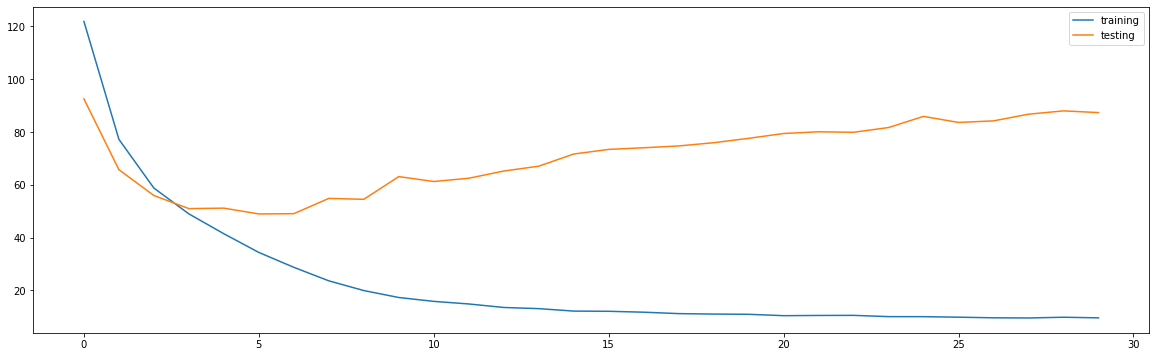

In [12]:
plot_loss_history(hist)

In [57]:
s = dense_vae.sample(1).reshape(-1)

comparison = np.array([accuracy_score(x, s) for x in X_train])

In [58]:
comparison.max()

0.703125

In [62]:
s

array([ 0, 10, 25, 25, 25,  7, 25, 25,  0,  7, 25, 25, 25, 25, 25, 14, 25,
       25, 13, 25, 25, 25, 25,  7,  0, 25, 25, 25, 25, 25, 25, 14,  0, 25,
       25, 25, 25,  7, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,  7, 25,
        7, 25, 25, 25,  0, 25, 14, 25, 25,  0, 25, 25, 25])

In [65]:
from random import randint

X_train[randint(0, len(X_train))]

array([ 0, 25, 12,  0, 15, 14, 16, 25, 17,  0, 12,  0, 15,  0, 16, 25,  0,
       14, 12,  0, 15, 14, 16, 25, 17, 25, 12,  0, 15,  0, 12,  0, 15, 14,
       12,  0, 15, 13,  0, 16, 17, 16, 12,  0, 15, 25, 16, 25, 17,  0, 12,
        0, 15, 14, 16, 25, 17, 15, 12,  0, 15,  0,  0, 12])

In [64]:
from sklearn.metrics import accuracy_score

accuracy_score(X_train.reshape(-1), dense_vae(X_train).numpy().argmax(-1).reshape(-1))

0.9856962316176471

In [5]:
from models.vae.variationalautoencoders import RNNVAE

encoder_hidden_units = (256, 512)
latent_dim = 1024
decoder_hidden_units = encoder_hidden_units[::-1]

rnn_vae = RNNVAE(encoder_hidden_units, latent_dim, decoder_hidden_units, timesteps, vocab_size, embed_size=16, bidirectional_encoder=True)

In [112]:
name = f"{rnn_vae.encoder.name}_{rnn_vae.decoder.name}"
learning_rate = 5e-3
epochs = 50
batch_size = 32

mc = ModelCheckpoint(f'Models/{name}.hdf5', monitor='val_loss')

optimizer = Adam(learning_rate=learning_rate)

In [113]:
rnn_vae.compile(optimizer=optimizer)

In [114]:
hist = rnn_vae.fit(X_train, X_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[mc])

Epoch 1/50
111/111 [==============================] - 13s 61ms/step - loss: 308.9577 - reconstruction_loss: 139.6668 - kl_loss: 76.1663 - val_loss: 131.3761 - val_reconstruction_loss: 130.5923 - val_kl_loss: 0.7839
Epoch 2/50
111/111 [==============================] - 5s 42ms/step - loss: 131.0263 - reconstruction_loss: 130.5653 - kl_loss: 0.3143 - val_loss: 130.0226 - val_reconstruction_loss: 129.6391 - val_kl_loss: 0.3835
Epoch 3/50
111/111 [==============================] - 5s 43ms/step - loss: 140.7860 - reconstruction_loss: 132.2725 - kl_loss: 42.3520 - val_loss: 154.2619 - val_reconstruction_loss: 135.2253 - val_kl_loss: 19.0366
Epoch 4/50
111/111 [==============================] - 5s 42ms/step - loss: 253.8222 - reconstruction_loss: 132.4983 - kl_loss: 67.3523 - val_loss: 138.6471 - val_reconstruction_loss: 132.4354 - val_kl_loss: 6.2117
Epoch 5/50
111/111 [==============================] - 5s 42ms/step - loss: 133.3614 - reconstruction_loss: 130.7167 - kl_loss: 0.7329 - val_los

KeyboardInterrupt: 

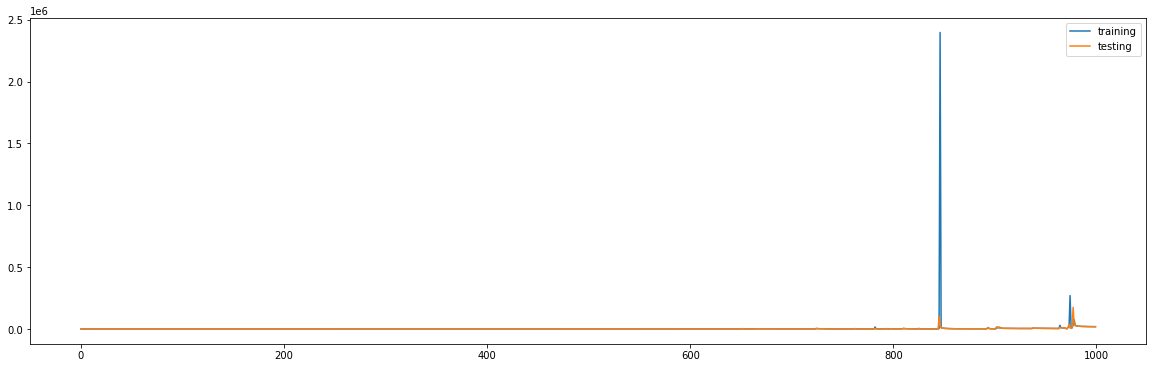

In [13]:
from plotting import plot_loss_history

plot_loss_history(hist)

In [14]:
rnn_vae.sample()

array([[ 0, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37],
       [ 0, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37],
       [ 0, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37],
       [ 0, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3

In [90]:
from sklearn.metrics import accuracy_score

accuracy_score(X_train.reshape(-1), rnn_vae(X_train).numpy().argmax(-1).reshape(-1))

NameError: name 'rnn_vae' is not defined

In [134]:
from models.vae.variationalautoencoders import CNNVAE

encoder_filter_sizes = (512, 256, 128)
encoder_dilation_rates = 2
latent_dim = 128
decoder_filter_sizes = encoder_filter_sizes[::-1]
decoder_dilation_rates = 2
decoder_dense_unit = latent_dim


cnn_vae = CNNVAE(encoder_filter_sizes, latent_dim, decoder_filter_sizes, decoder_dense_unit, timesteps, vocab_size, embed_size=32)

In [135]:
name = f"{cnn_vae.encoder.name}_{cnn_vae.decoder.name}"
learning_rate = 5e-3
epochs = 100
batch_size = 32

mc = ModelCheckpoint(f'Models/{name}.hdf5', monitor='val_loss')

optimizer = Adam(learning_rate=learning_rate)

In [136]:
cnn_vae.compile(optimizer=optimizer)

In [137]:
hist = cnn_vae.fit(X_train, X_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[mc])

Epoch 1/100
111/111 [==============================] - 4s 20ms/step - loss: 158.4155 - reconstruction_loss: 139.0300 - kl_loss: 0.1501 - val_loss: 127.7146 - val_reconstruction_loss: 127.6812 - val_kl_loss: 0.0334
Epoch 2/100
111/111 [==============================] - 1s 13ms/step - loss: 128.6755 - reconstruction_loss: 127.8884 - kl_loss: 0.0183 - val_loss: 127.3618 - val_reconstruction_loss: 127.3561 - val_kl_loss: 0.0057
Epoch 3/100
111/111 [==============================] - 2s 14ms/step - loss: 127.5248 - reconstruction_loss: 127.5721 - kl_loss: 0.0047 - val_loss: 127.0273 - val_reconstruction_loss: 127.0241 - val_kl_loss: 0.0032
Epoch 4/100
111/111 [==============================] - 2s 15ms/step - loss: 127.2668 - reconstruction_loss: 127.5519 - kl_loss: 0.0020 - val_loss: 126.9109 - val_reconstruction_loss: 126.9086 - val_kl_loss: 0.0023
Epoch 5/100
111/111 [==============================] - 2s 14ms/step - loss: 127.0742 - reconstruction_loss: 127.4792 - kl_loss: 0.0016 - val_los

KeyboardInterrupt: 

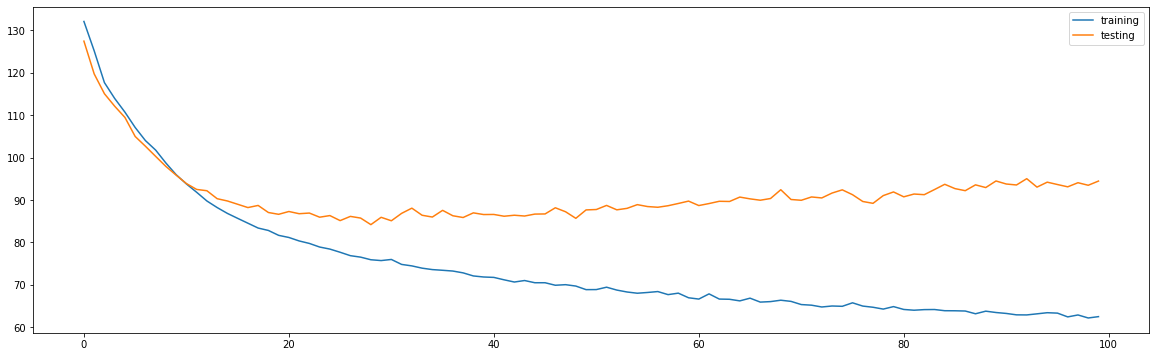

In [107]:
plot_loss_history(hist)

In [109]:
cnn_vae.sample(10)

array([[ 0, 11, 25, 25, 25, 11, 25, 25, 25, 12, 25, 25, 25, 12, 25, 13,
        25, 25, 25, 25, 25, 12, 25, 25, 25, 12, 25, 25,  0, 12, 25, 13,
        25, 12, 25, 25, 25, 12, 25, 25, 25, 12, 25, 25,  0, 12, 25, 25,
        25, 25, 25, 25, 25, 12, 25, 25, 25, 12, 25, 25,  0, 25, 25, 12],
       [ 0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 10, 25, 12, 25, 11,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 10, 25, 12, 25, 11,
        25, 12, 25, 25, 25, 25, 25, 25, 25, 25, 25, 11, 25,  0, 25, 11,
        25,  0, 25, 25,  0, 25, 25,  0, 25, 25, 25, 25, 25, 25, 25, 11],
       [ 0, 25, 25, 25, 25, 25, 25, 25, 25, 11, 25, 25,  0, 12, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 11, 25, 25,  0, 12, 25, 25,
        25, 11, 25, 25, 25, 25, 25, 25, 25, 11, 25, 25,  0, 12, 25, 25,
        25, 25, 25,  0, 25, 25, 25, 25,  0, 25, 25, 25, 25,  0, 25, 11],
       [ 0, 25, 25, 25, 25, 25, 25, 25, 25, 11, 25, 25,  0, 11, 25, 25,
        25, 25, 25,  0, 25, 11, 25, 25, 25, 12, 25, 25,  0, 1

In [65]:
cnn_vae.save_samples(10)